In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load example data (from CSL-SHARE database)

In [2]:
import utils

train_data, y_train, test_data, y_test = utils.get_train_test_data()

print("# Train : ", len(train_data))
print("# Test  : ", len(test_data))
print("Class Labels : ", set(y_train))

# Train :  2095
# Test  :  655
Class Labels :  {'sit-to-stand', 'stand', 'walk', 'walk-curve-left', 'stand-to-sit', 'sit', 'walk-curve-right'}


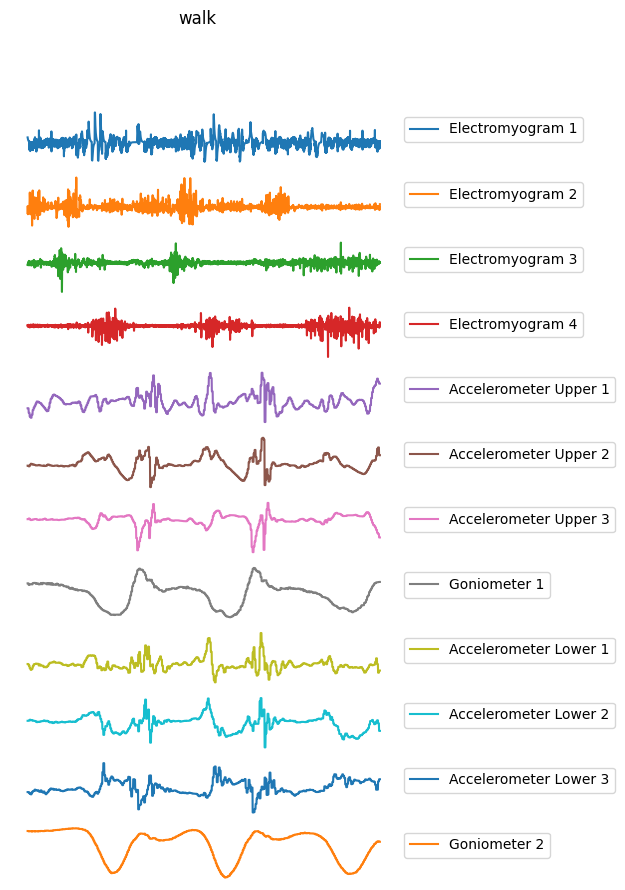

In [3]:
sample, label = utils.plot_random_sample_by_class(train_data, y_train, "walk", ylim=False)


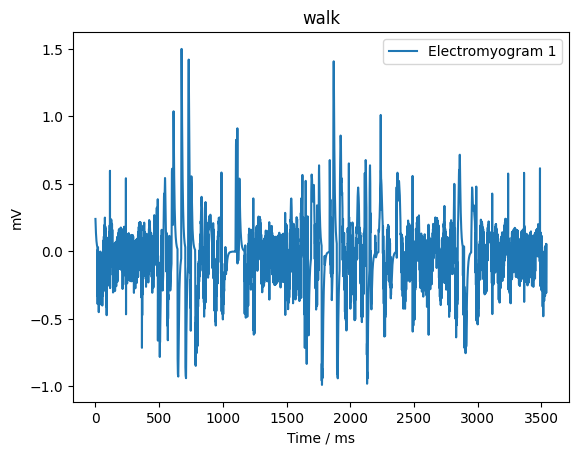

In [4]:
utils.plot_sensor_data(sample, label, "Electromyogram 1")

### Feature Extraction with TSFEL

In [5]:
import tsfel

cfg = tsfel.get_features_by_domain("statistical") 

X_train = tsfel.time_series_features_extractor(cfg, train_data, fs=1000)
X_test = tsfel.time_series_features_extractor(cfg, test_data, fs=1000)


/home/marilia.barandas/anaconda3/envs/tsfel-tutorials/lib/python3.11/site-packages/tsfel/feature_extraction/features.py:498: FutureWarning: The histogram feature was deprecated in version 0.1.8 and will be replaced by the mode of histogram in 0.1.9. From then on, only a single feature value will be returned.
  warnings.warn(
/home/marilia.barandas/anaconda3/envs/tsfel-tutorials/lib/python3.11/site-packages/tsfel/feature_extraction/features.py:498: FutureWarning: The histogram feature was deprecated in version 0.1.8 and will be replaced by the mode of histogram in 0.1.9. From then on, only a single feature value will be returned.
  warnings.warn(
/home/marilia.barandas/anaconda3/envs/tsfel-tutorials/lib/python3.11/site-packages/tsfel/feature_extraction/features.py:498: FutureWarning: The histogram feature was deprecated in version 0.1.8 and will be replaced by the mode of histogram in 0.1.9. From then on, only a single feature value will be returned.
  warnings.warn(
/home/marilia.baran

/home/marilia.barandas/anaconda3/envs/tsfel-tutorials/lib/python3.11/site-packages/tsfel/feature_extraction/features.py:498: FutureWarning: The histogram feature was deprecated in version 0.1.8 and will be replaced by the mode of histogram in 0.1.9. From then on, only a single feature value will be returned.
  warnings.warn(
/home/marilia.barandas/anaconda3/envs/tsfel-tutorials/lib/python3.11/site-packages/tsfel/feature_extraction/features.py:498: FutureWarning: The histogram feature was deprecated in version 0.1.8 and will be replaced by the mode of histogram in 0.1.9. From then on, only a single feature value will be returned.
  warnings.warn(
/home/marilia.barandas/anaconda3/envs/tsfel-tutorials/lib/python3.11/site-packages/tsfel/feature_extraction/features.py:498: FutureWarning: The histogram feature was deprecated in version 0.1.8 and will be replaced by the mode of histogram in 0.1.9. From then on, only a single feature value will be returned.
  warnings.warn(
/home/marilia.baran

In [6]:
X_train

,Accelerometer Lower 1_Absolute energy,Accelerometer Lower 1_Average power,Accelerometer Lower 1_ECDF Percentile Count_0,Accelerometer Lower 1_ECDF Percentile Count_1,Accelerometer Lower 1_ECDF Percentile_0,Accelerometer Lower 1_ECDF Percentile_1,Accelerometer Lower 1_ECDF_0,Accelerometer Lower 1_ECDF_1,Accelerometer Lower 1_ECDF_2,Accelerometer Lower 1_ECDF_3,...,Goniometer 2_Mean,Goniometer 2_Mean absolute deviation,Goniometer 2_Median,Goniometer 2_Median absolute deviation,Goniometer 2_Min,Goniometer 2_Peak to peak distance,Goniometer 2_Root mean square,Goniometer 2_Skewness,Goniometer 2_Standard deviation,Goniometer 2_Variance
0,84.443735,51.209057,330.0,1320.0,0.2240,0.2280,0.000606,0.001212,0.001818,0.002424,...,-81.685669,0.256194,-81.620659,0.201439,-82.406272,1.233815,81.686271,-0.505002,0.313631,0.098364
1,118.143792,62.213687,380.0,1520.0,0.2472,0.2514,0.000526,0.001053,0.001579,0.002105,...,-80.255723,0.270297,-80.170297,0.206475,-81.117061,1.329499,80.256382,-0.729945,0.325304,0.105823
2,100.938194,67.337020,300.0,1200.0,0.2576,0.2616,0.000667,0.001333,0.002000,0.002667,...,-78.919527,0.239189,-78.881086,0.206475,-79.606267,1.148204,78.920090,-0.690931,0.297981,0.088792
3,119.928596,74.536107,322.0,1288.0,0.2708,0.2744,0.000621,0.001242,0.001863,0.002484,...,-79.783058,0.223465,-79.747274,0.181295,-80.553031,1.218707,79.783553,-0.669744,0.281014,0.078969
4,89.343941,60.408344,296.0,1184.0,0.2440,0.2480,0.000676,0.001351,0.002027,0.002703,...,-79.729819,0.265576,-79.679289,0.244245,-80.452312,1.188491,79.730470,-0.572842,0.322271,0.103858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,137.664664,27.649059,996.0,3984.0,-0.0992,0.1184,0.000201,0.000402,0.000602,0.000803,...,-14.181352,11.649429,-7.188863,3.827345,-49.959448,47.967717,20.195522,-1.294199,14.378746,206.748343
2091,164.713474,33.282173,990.0,3960.0,-0.1152,0.1392,0.000202,0.000404,0.000606,0.000808,...,-14.093314,11.565999,-6.639941,3.283459,-50.951536,49.080669,20.057364,-1.338097,14.271523,203.676356
2092,129.624903,26.843012,966.0,3864.0,-0.1116,0.1224,0.000207,0.000414,0.000621,0.000828,...,-13.510165,12.080754,-6.000371,3.112236,-49.833548,48.083545,19.940911,-1.279248,14.666811,215.115354
2093,160.568765,34.316898,936.0,3744.0,-0.1160,0.1344,0.000214,0.000427,0.000641,0.000855,...,-13.646959,12.379544,-5.282744,2.747128,-50.271679,48.864122,20.323648,-1.274278,15.060251,226.811157


### Classification with TSFEL

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

# Remove correlated features
corr_feat = tsfel.correlated_features(X_train)
X_train.drop(corr_feat, axis=1, inplace=True)
X_test.drop(corr_feat, axis=1, inplace=True)

# Classification
clf = RandomForestClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

print("Accuracy - TRAIN: ", accuracy_score(y_train, y_pred_train))
print("Accuracy - TEST : ", accuracy_score(y_test, y_pred))


Accuracy - TRAIN:  0.9494033412887828
Accuracy - TEST :  0.7236641221374046


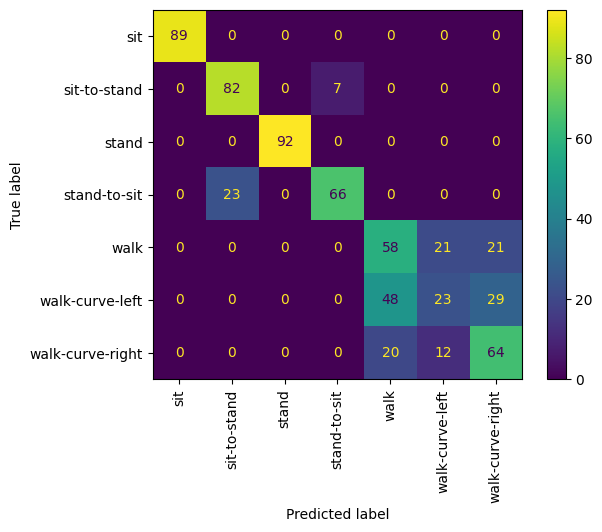

In [8]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation="vertical") #, cmap="Greens")

### Adding temporal features

In [9]:
cfg = tsfel.get_features_by_domain() # | tsfel.get_features_by_domain("spectral")

X_train = tsfel.time_series_features_extractor(cfg, train_data, fs=1000)
X_test = tsfel.time_series_features_extractor(cfg, test_data, fs=1000)

# Remove correlated features
corr_feat = tsfel.correlated_features(X_train)
X_train.drop(corr_feat, axis=1, inplace=True)
X_test.drop(corr_feat, axis=1, inplace=True)

# Classification
clf = RandomForestClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

print("Accuracy - TRAIN: ", accuracy_score(y_train, y_pred_train))
print("Accuracy - TEST : ", accuracy_score(y_test, y_pred))

/home/marilia.barandas/anaconda3/envs/tsfel-tutorials/lib/python3.11/site-packages/tsfel/feature_extraction/features.py:498: FutureWarning: The histogram feature was deprecated in version 0.1.8 and will be replaced by the mode of histogram in 0.1.9. From then on, only a single feature value will be returned.
  warnings.warn(
/home/marilia.barandas/anaconda3/envs/tsfel-tutorials/lib/python3.11/site-packages/tsfel/feature_extraction/features.py:498: FutureWarning: The histogram feature was deprecated in version 0.1.8 and will be replaced by the mode of histogram in 0.1.9. From then on, only a single feature value will be returned.
  warnings.warn(
/home/marilia.barandas/anaconda3/envs/tsfel-tutorials/lib/python3.11/site-packages/tsfel/feature_extraction/features.py:498: FutureWarning: The histogram feature was deprecated in version 0.1.8 and will be replaced by the mode of histogram in 0.1.9. From then on, only a single feature value will be returned.
  warnings.warn(
/home/marilia.baran

/home/marilia.barandas/anaconda3/envs/tsfel-tutorials/lib/python3.11/site-packages/tsfel/feature_extraction/features.py:498: FutureWarning: The histogram feature was deprecated in version 0.1.8 and will be replaced by the mode of histogram in 0.1.9. From then on, only a single feature value will be returned.
  warnings.warn(
/home/marilia.barandas/anaconda3/envs/tsfel-tutorials/lib/python3.11/site-packages/tsfel/feature_extraction/features.py:498: FutureWarning: The histogram feature was deprecated in version 0.1.8 and will be replaced by the mode of histogram in 0.1.9. From then on, only a single feature value will be returned.
  warnings.warn(
/home/marilia.barandas/anaconda3/envs/tsfel-tutorials/lib/python3.11/site-packages/tsfel/feature_extraction/features.py:498: FutureWarning: The histogram feature was deprecated in version 0.1.8 and will be replaced by the mode of histogram in 0.1.9. From then on, only a single feature value will be returned.
  warnings.warn(
/home/marilia.baran

Accuracy - TRAIN:  0.9751789976133651
Accuracy - TEST :  0.7725190839694657


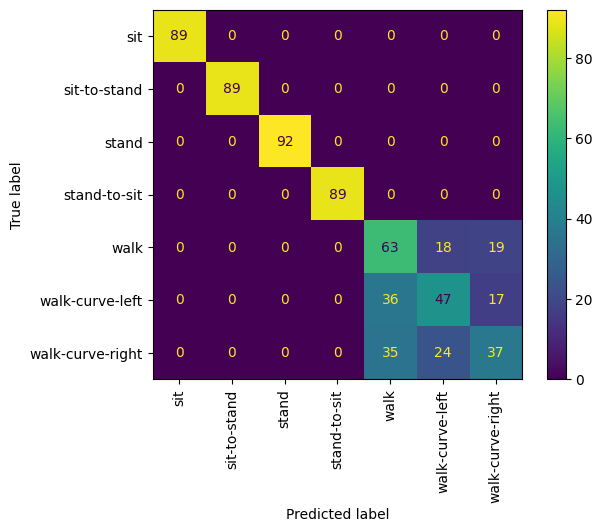

In [10]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation="vertical") #, cmap="Greens")